# Task 2 Part 2: Fashion MNIST Classification with CNN

## Objective
The Fashion MNIST dataset consists of 28x28 grayscale images of 10 fashion categories, such as T-shirts, sneakers, and coats. The task is to develop a CNN model to classify clothing items into their respective categories.

## Questions to Answer:
1. How do convolutional filters influence feature extraction in a CNN model? Which layer contributes the most to accurate clothing classification?
2. If the training accuracy is high but validation accuracy is low, what does it imply about model generalization? If increasing epochs leads to worse validation performance, what could be happening? If test accuracy fluctuates significantly with retraining, what does that say about model robustness?

## 1. Import Required Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


## 2. Load and Preprocess the Data

In [11]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [12]:
# Normalize pixel values (0-255) to (0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN input (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Preprocessed training data shape: {x_train.shape}")
print(f"Preprocessed training labels shape: {y_train_cat.shape}")

Preprocessed training data shape: (60000, 28, 28, 1)
Preprocessed training labels shape: (60000, 10)


## 3. Visualize Sample Images

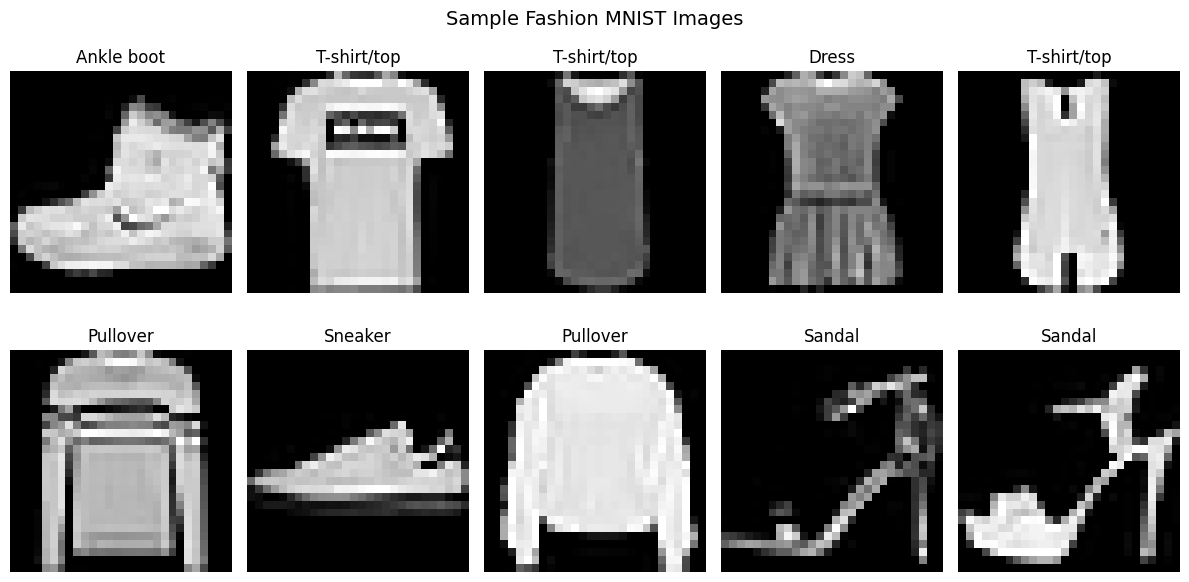

In [13]:
# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot sample images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.suptitle('Sample Fashion MNIST Images', y=1.02, fontsize=14)
plt.show()

## 4. Build the CNN Model

We'll build a CNN with multiple convolutional layers to demonstrate how different layers extract different features.

In [14]:
# Build a more comprehensive CNN model with multiple convolutional layers
def build_cnn_model():
    model = models.Sequential([
        # First Convolutional Block - extracts low-level features (edges, corners)
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv1'),
        layers.MaxPooling2D((2, 2), name='pool1'),
        
        # Second Convolutional Block - extracts mid-level features (textures, patterns)
        layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
        layers.MaxPooling2D((2, 2), name='pool2'),
        
        # Third Convolutional Block - extracts high-level features (complex patterns)
        layers.Conv2D(128, (3, 3), activation='relu', name='conv3'),
        
        # Flatten and Dense layers for classification
        layers.Flatten(name='flatten'),
        layers.Dropout(0.5, name='dropout'),  # Regularization
        layers.Dense(128, activation='relu', name='dense1'),
        layers.Dense(10, activation='softmax', name='output')
    ])
    return model

model = build_cnn_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Compile and Train the Model

In [15]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    x_train, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7803 - loss: 0.5868 - val_accuracy: 0.8627 - val_loss: 0.3851
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8604 - loss: 0.3788 - val_accuracy: 0.8832 - val_loss: 0.3258
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8795 - loss: 0.3253 - val_accuracy: 0.8921 - val_loss: 0.2953
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8923 - loss: 0.2929 - val_accuracy: 0.8928 - val_loss: 0.2854
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9003 - loss: 0.2703 - val_accuracy: 0.8999 - val_loss: 0.2724
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9056 - loss: 0.2527 - val_accuracy: 0.9021 - val_loss: 0.2643
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9120 - loss: 0.2382 - val_accuracy: 0.9031 - val_loss: 0.2650
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9165 - loss: 0.2257 - 

## 6. Evaluate the Model

In [16]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Test Loss: 0.2577
Test Accuracy: 0.9075


## 7. Visualize Training History

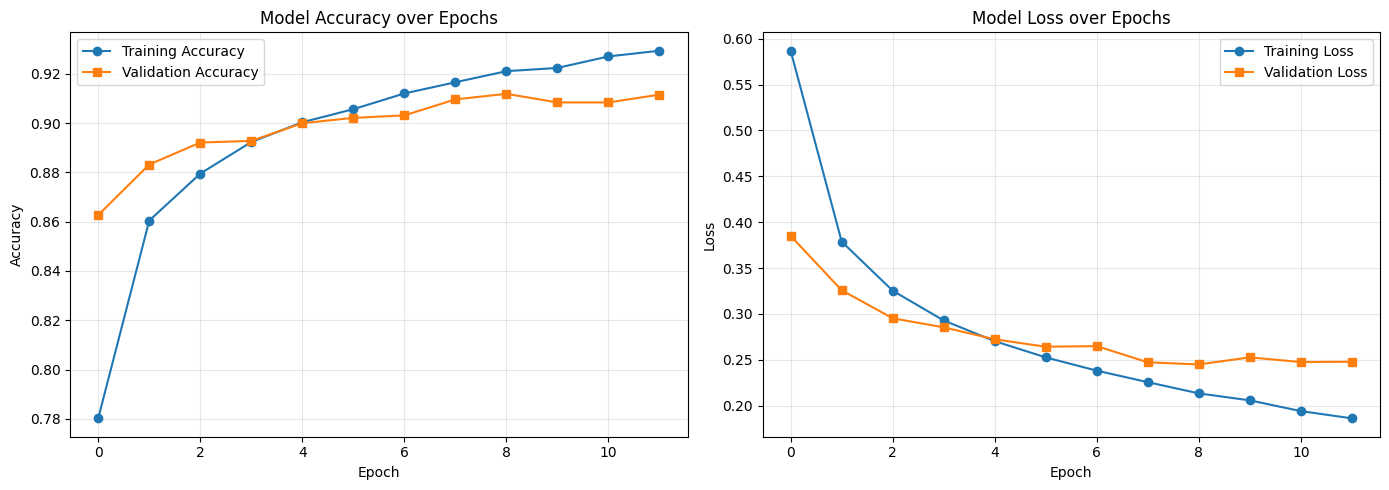

In [17]:
# Plot Accuracy and Loss Curves
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Visualize Convolutional Filters and Feature Maps

This section demonstrates how convolutional filters extract different features at each layer.

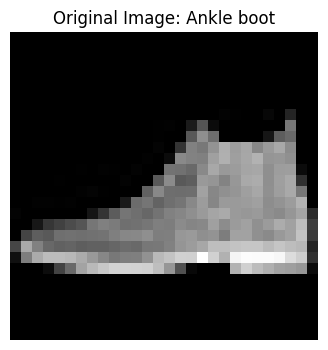

In [21]:
# Get feature maps for a sample image
sample_idx = 0
sample_image = x_test[sample_idx:sample_idx+1]

# Create feature extraction functions for each convolutional layer
# Using tf.keras.backend.function to extract intermediate outputs
from tensorflow.keras import backend as K

# Get the convolutional layer names
conv_layer_names = ['conv1', 'conv2', 'conv3']

# Extract feature maps by creating a new model for each conv layer
feature_maps = []
for layer_name in conv_layer_names:
    # Create a model that outputs the feature maps from this layer
    layer = model.get_layer(layer_name)
    intermediate_model = Model(inputs=model.inputs, outputs=layer.output)
    feature_map = intermediate_model.predict(sample_image, verbose=0)
    feature_maps.append(feature_map)

# Plot the original image
plt.figure(figsize=(4, 4))
plt.imshow(sample_image[0].reshape(28, 28), cmap='gray')
plt.title(f'Original Image: {class_names[y_test[sample_idx]]}')
plt.axis('off')
plt.show()

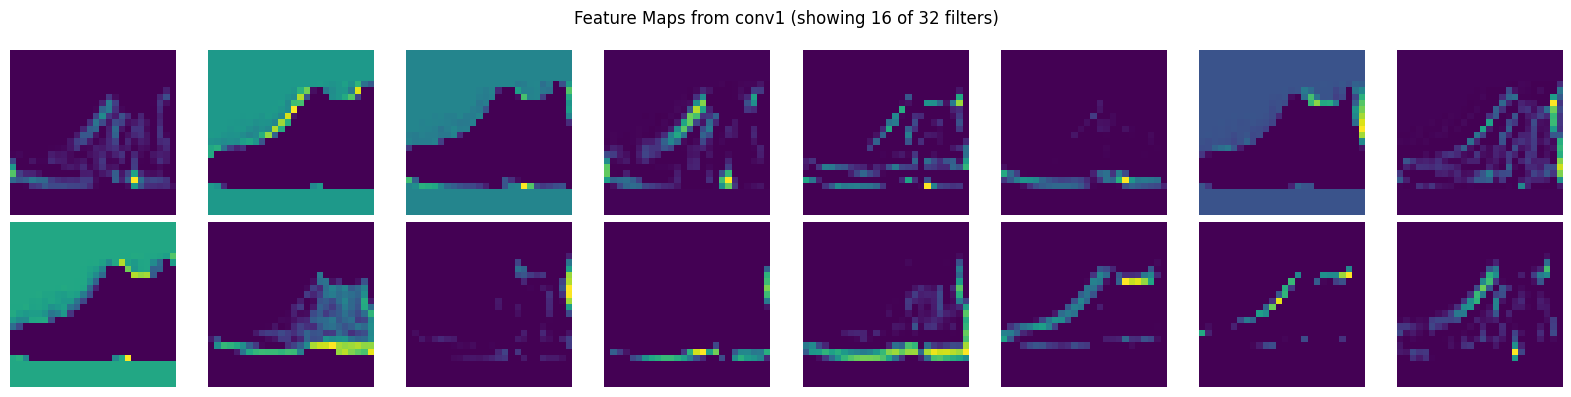

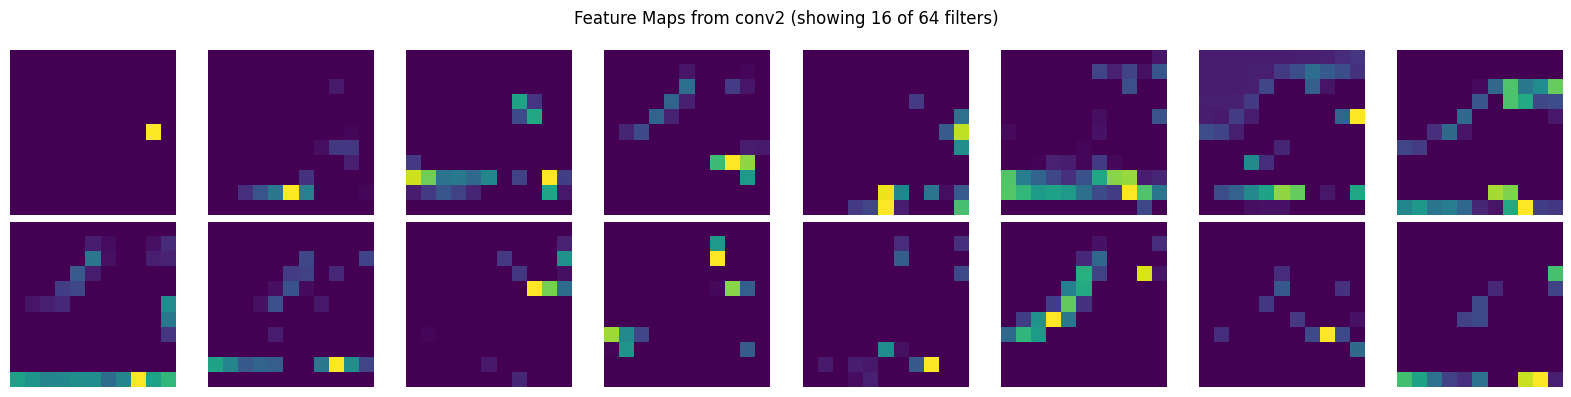

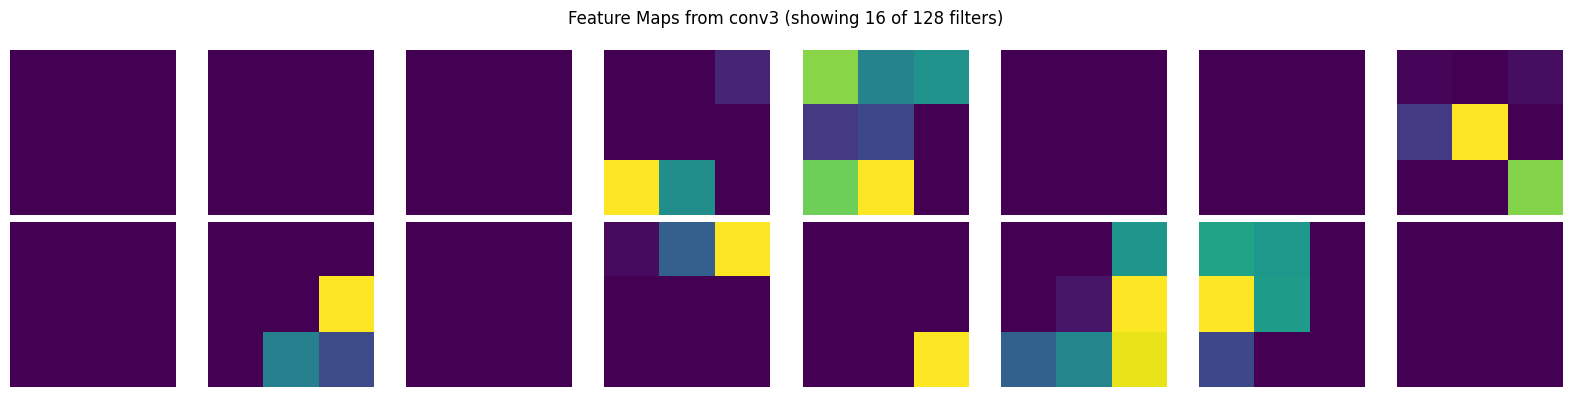

In [22]:
# Visualize feature maps from each convolutional layer
layer_names = ['conv1', 'conv2', 'conv3']

for i, (feature_map, layer_name) in enumerate(zip(feature_maps, layer_names)):
    n_features = min(16, feature_map.shape[-1])  # Show up to 16 filters
    
    plt.figure(figsize=(16, 4))
    plt.suptitle(f'Feature Maps from {layer_name} (showing {n_features} of {feature_map.shape[-1]} filters)', 
                 fontsize=12)
    
    for j in range(n_features):
        plt.subplot(2, 8, j+1)
        plt.imshow(feature_map[0, :, :, j], cmap='viridis')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

## 9. Visualize Learned Filters (Weights)

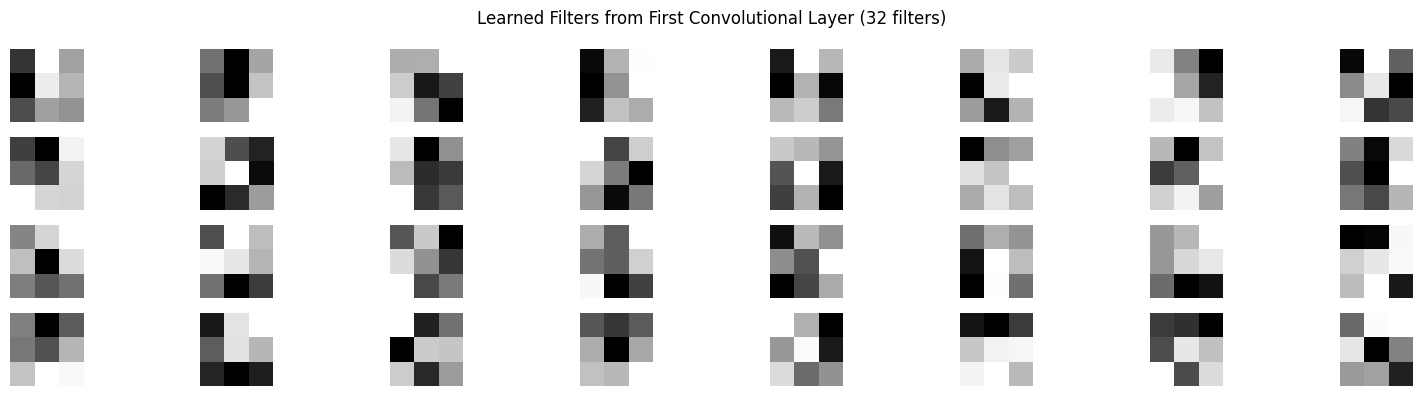

In [23]:
# Get weights from the first convolutional layer
conv1_layer = model.get_layer('conv1')
filters, biases = conv1_layer.get_weights()

# Normalize filter values for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot the filters
n_filters = filters.shape[-1]
plt.figure(figsize=(16, 4))
plt.suptitle(f'Learned Filters from First Convolutional Layer ({n_filters} filters)', fontsize=12)

for i in range(min(32, n_filters)):
    plt.subplot(4, 8, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 10. Make Predictions and Show Results

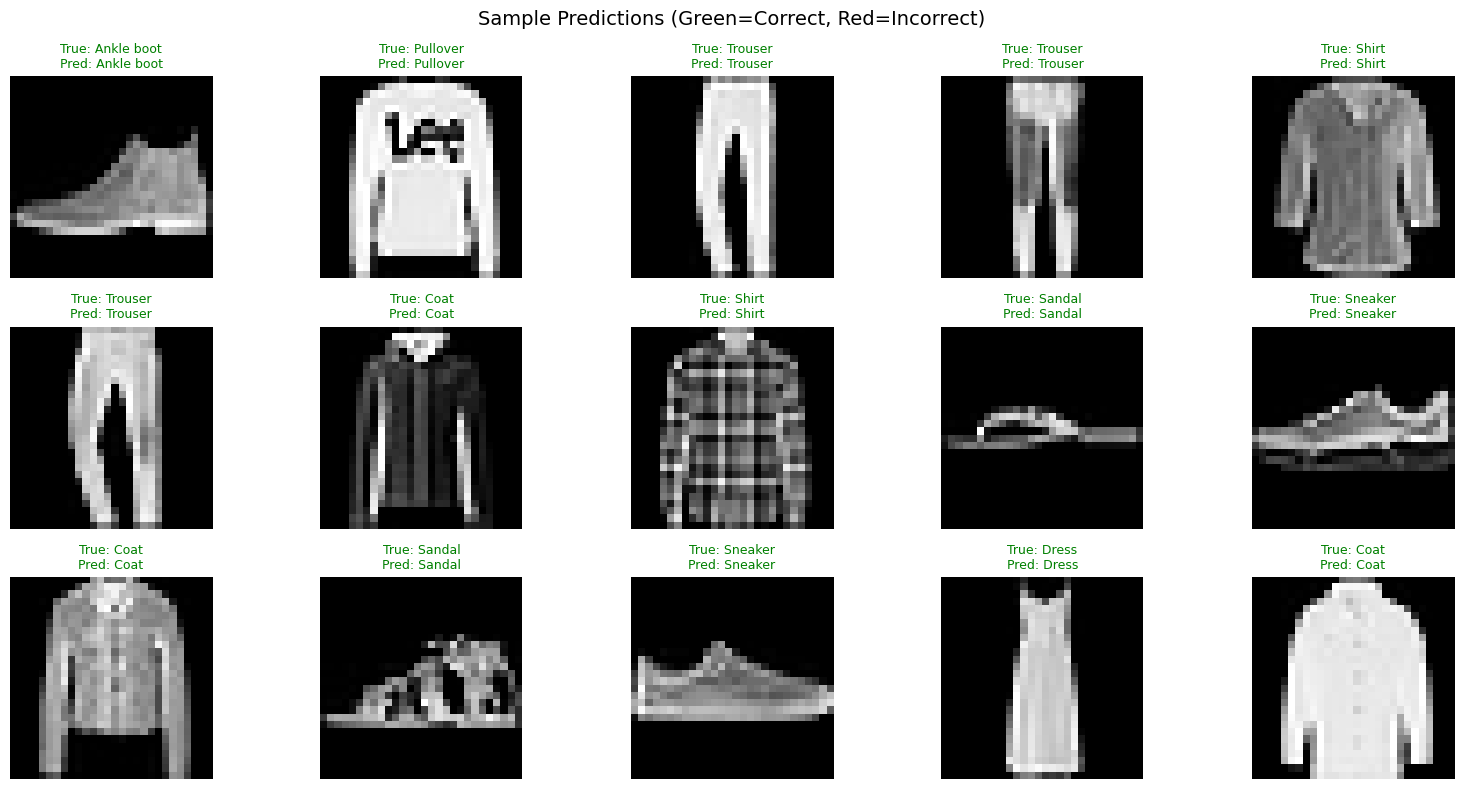

In [24]:
# Make predictions on test set
predictions = model.predict(x_test, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

# Show some predictions
plt.figure(figsize=(16, 8))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    true_label = class_names[y_test[i]]
    pred_label = class_names[predicted_classes[i]]
    color = 'green' if y_test[i] == predicted_classes[i] else 'red'
    plt.title(f'True: {true_label}\nPred: {pred_label}', color=color, fontsize=9)
    plt.axis('off')

plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', fontsize=14)
plt.tight_layout()
plt.show()

---

# Answers to Questions

## Question 1: How do convolutional filters influence feature extraction in a CNN model? Which layer contributes the most to accurate clothing classification?

### How Convolutional Filters Influence Feature Extraction:

Convolutional filters (also called kernels) are small matrices of learnable weights that slide across input images to detect specific patterns and features. Here's how they work at different levels:

1. **First Convolutional Layer (conv1 - Low-Level Features)**:
   - Detects basic features like **edges**, **corners**, **lines**, and **simple textures**
   - These filters respond to horizontal, vertical, and diagonal edges
   - Essential for identifying the outlines and boundaries of clothing items
   - Example: Detecting the collar of a shirt or the sole of a shoe

2. **Second Convolutional Layer (conv2 - Mid-Level Features)**:
   - Combines low-level features to detect more **complex patterns**
   - Identifies **textures**, **patterns**, and **shapes**
   - Can detect features like fabric patterns, button arrangements, or shoe laces
   - Example: Recognizing the mesh pattern of a sneaker or stripes on a shirt

3. **Third Convolutional Layer (conv3 - High-Level Features)**:
   - Combines mid-level features to form **abstract, semantic representations**
   - Detects **object parts** and **category-specific features**
   - Can identify complete shapes like sleeves, collars, heels, or bag handles
   - Example: Recognizing the overall shape of a dress vs. a coat

### Which Layer Contributes Most to Classification:

**The deeper convolutional layers (conv2 and conv3) typically contribute the most to accurate classification.** Here's why:

- **Hierarchical Feature Learning**: Early layers detect simple features that are common across many clothing types, while deeper layers learn discriminative features that distinguish between categories.

- **Increased Receptive Field**: Deeper layers have a larger receptive field, meaning they "see" more of the original image and can understand global context.

- **Semantic Richness**: Higher-level features are more semantically meaningful and directly correspond to clothing characteristics that distinguish categories.

However, **all layers work together synergistically**. Without the low-level edge detectors, the higher layers wouldn't have the building blocks to create meaningful features. The dense layers at the end then use these hierarchical features to make the final classification decision.

---

## Question 2: Model Generalization and Robustness Issues

### If training accuracy is high but validation accuracy is low:

This indicates **overfitting** - the model has memorized the training data rather than learning generalizable patterns.

**Causes:**
- Model is too complex (too many parameters) for the amount of training data
- Insufficient regularization (dropout, L1/L2 penalties)
- Training for too many epochs
- Training data not representative of the true distribution

**Solutions:**
- Add dropout layers
- Use L2 regularization
- Reduce model complexity (fewer layers/neurons)
- Use data augmentation
- Early stopping based on validation loss
- Increase training data size

### If increasing epochs leads to worse validation performance:

This is a classic sign of **overfitting during training**.

**What's happening:**
- Initially, both training and validation performance improve
- At some point, the model starts to memorize training examples
- Training loss continues to decrease while validation loss increases
- The model is fitting noise in the training data instead of underlying patterns

**Solutions:**
- Implement **early stopping** to stop training when validation loss stops improving
- Use **learning rate scheduling** to reduce learning rate over time
- Apply **model checkpointing** to save the best model based on validation performance
- Increase dropout rate

### If test accuracy fluctuates significantly with retraining:

This indicates **poor model robustness** and **high variance**.

**What it says about the model:**
- The model is highly sensitive to initialization and training randomness
- The learning process is unstable
- The model may be finding different local minima in the loss landscape each time
- The architecture or hyperparameters may not be optimal for the task

**Solutions:**
- Set random seeds for reproducibility
- Use **ensemble methods** (train multiple models and average predictions)
- Implement **batch normalization** to stabilize training
- Try different optimizers or learning rates
- Increase batch size for more stable gradient estimates
- Use **cross-validation** to get more reliable performance estimates
- Consider a simpler model architecture that's less prone to variance

## Summary

In this notebook, we:

1. **Built a CNN model** with three convolutional layers to classify Fashion MNIST images
2. **Visualized feature maps** to understand how different layers extract different features
3. **Visualized learned filters** to see what patterns the model has learned to detect
4. **Analyzed model performance** using accuracy and loss curves
5. **Answered questions** about:
   - How convolutional filters influence feature extraction (hierarchical learning from edges to complex patterns)
   - Which layers contribute most to classification (deeper layers with more semantic features)
   - Model generalization issues (overfitting indicators and solutions)
   - Model robustness concerns (variance in test accuracy and stabilization techniques)